In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def get_historical_price(symbol, days):
    url = f"https://api.coingecko.com/api/v3/coins/{symbol}/market_chart"
    params = {
        'vs_currency': 'eur',
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    df_prices = pd.DataFrame(data['prices'], columns=['time', 'price'])
    df_prices['time'] = pd.to_datetime(df_prices['time'], unit='ms')
    df_prices.set_index('time', inplace=True)
    
    return df_prices

# Get the last 30 days of price data for Ethereum
df_ethereum = get_historical_price('ethereum', 30)

# Resample the DataFrame to get daily OHLC data
df_ethereum_daily = df_ethereum.resample('D').agg({'price': ['first', 'max', 'min', 'last']})

# Rename columns for clarity
df_ethereum_daily.columns = ['open', 'high', 'low', 'close']

# Drop NaN values
df_ethereum_daily = df_ethereum_daily.dropna()

print(df_ethereum_daily)

                   open         high          low        close
time                                                          
2024-04-11  3283.821118  3283.821118  3263.235452  3269.428302
2024-04-12  3266.922363  3315.964108  3018.461078  3020.055193
2024-04-13  3042.394718  3079.034389  2755.195814  2855.546073
2024-04-14  2835.128219  2972.450555  2761.760057  2972.450555
2024-04-15  2962.676257  3063.952061  2879.356353  2940.444764
2024-04-16  2919.019747  2928.427709  2840.952600  2913.247798
2024-04-17  2906.400936  2933.303913  2771.183830  2816.130803
2024-04-18  2795.661062  2895.397765  2776.206972  2885.416853
2024-04-19  2881.416359  2922.975135  2749.126092  2883.896914
2024-04-20  2867.910228  2960.502362  2846.608422  2948.760971
2024-04-21  2960.918702  2984.382305  2941.201743  2960.880052
2024-04-22  2952.701290  3025.652137  2945.057275  3021.191797
2024-04-23  3004.069230  3036.069490  2960.399820  3004.821261
2024-04-24  3007.848081  3069.643137  2922.253376  2927

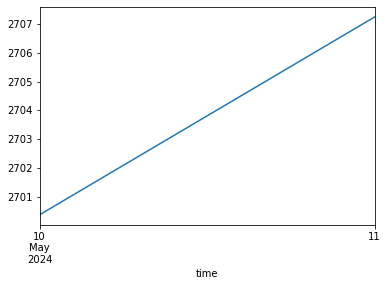

In [22]:
# Checks if there is a local top detected at curr index
def rw_top(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order * 2 + 1:
        return False

    top = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] > v or data[k - i] > v:
            top = False
            break
    
    return top

# Checks if there is a local top detected at curr index
def rw_bottom(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order * 2 + 1:
        return False

    bottom = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] < v or data[k - i] < v:
            bottom = False
            break
    
    return bottom

def rw_extremes(data: np.array, order:int):
    # Rolling window local tops and bottoms
    tops = []
    bottoms = []
    for i in range(len(data)):
        if rw_top(data, i, order):
            # top[0] = confirmation index
            # top[1] = index of top
            # top[2] = price of top
            top = [i, i - order, data[i - order]]
            tops.append(top)
        
        if rw_bottom(data, i, order):
            # bottom[0] = confirmation index
            # bottom[1] = index of bottom
            # bottom[2] = price of bottom
            bottom = [i, i - order, data[i - order]]
            bottoms.append(bottom)
    
    return tops, bottoms

def get_historical_price(symbol, days):
    url = f"https://api.coingecko.com/api/v3/coins/{symbol}/market_chart"
    params = {
        'vs_currency': 'eur',
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    df_prices = pd.DataFrame(data['prices'], columns=['time', 'price'])
    df_prices['time'] = pd.to_datetime(df_prices['time'], unit='ms')
    df_prices.set_index('time', inplace=True)
    
    return df_prices

if __name__ == "__main__":
#     data = pd.read_csv('BTCUSDT86400.csv')
#     data = df_ethereum_daily



    # Get the last 30 days of price data for Ethereum
    df_ethereum = get_historical_price('ethereum', 1)

    # Resample the DataFrame to get daily OHLC data
    df_ethereum_daily = df_ethereum.resample('D').agg({'price': ['first', 'max', 'min', 'last']})

    # Rename columns for clarity
    df_ethereum_daily.columns = ['open', 'high', 'low', 'close']

    # Drop NaN values
    df_ethereum_daily = df_ethereum_daily.dropna()

#     print(df_ethereum_daily)
    
    
    
    
    
    data = df_ethereum_daily
#     data['date'] = data['date'].astype('datetime64[s]')
#     data = data.set_index('date')

    tops, bottoms = rw_extremes(data['close'].to_numpy(), 10)
    data['close'].plot()
    idx = data.index
    for top in tops:
        plt.plot(idx[top[1]], top[2], marker='o', color='green')

    for bottom in bottoms:
        plt.plot(idx[bottom[1]], bottom[2], marker='o', color='red')


    plt.show()

In [13]:

# Checks if there is a local top detected at curr index
def rw_top(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order * 2 + 1:
        return False

    top = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] > v or data[k - i] > v:
            top = False
            break
    
    return top

# Checks if there is a local top detected at curr index
def rw_bottom(data: np.array, curr_index: int, order: int) -> bool:
    if curr_index < order * 2 + 1:
        return False

    bottom = True
    k = curr_index - order
    v = data[k]
    for i in range(1, order + 1):
        if data[k + i] < v or data[k - i] < v:
            bottom = False
            break
    
    return bottom

def rw_extremes(data: np.array, order:int):
    # Rolling window local tops and bottoms
    tops = []
    bottoms = []
    for i in range(len(data)):
        if rw_top(data, i, order):
            # top[0] = confirmation index
            # top[1] = index of top
            # top[2] = price of top
            top = [i, i - order, data[i - order]]
            tops.append(top)
        
        if rw_bottom(data, i, order):
            # bottom[0] = confirmation index
            # bottom[1] = index of bottom
            # bottom[2] = price of bottom
            bottom = [i, i - order, data[i - order]]
            bottoms.append(bottom)
    
    return tops, bottoms



if __name__ == "__main__":
    data = pd.read_csv('BTCUSDT86400.csv')
    data['date'] = data['date'].astype('datetime64[s]')
    data = data.set_index('date')

    tops, bottoms = rw_extremes(data['close'].to_numpy(), 10)
    data['close'].plot()
    idx = data.index
    for top in tops:
        plt.plot(idx[top[1]], top[2], marker='o', color='green')

    for bottom in bottoms:
        plt.plot(idx[bottom[1]], bottom[2], marker='o', color='red')


    plt.show()



KeyError: 'date'

                   open         high          low        close
time                                                          
2024-05-01  2744.027070  2775.526777  2744.027070  2765.579239
2024-05-02  2774.508050  2798.395473  2709.836857  2790.961711
2024-05-03  2783.227497  2893.405888  2761.976597  2887.509941
2024-05-04  2880.315198  2930.950972  2879.418382  2886.486463
2024-05-05  2895.492838  2940.242832  2863.678416  2910.004408
2024-05-06  2919.022067  2972.725154  2846.213580  2860.845402
2024-05-07  2844.585785  2900.990066  2826.638610  2826.638610
2024-05-08  2804.499125  2822.584711  2744.917442  2758.482430
2024-05-09  2766.938397  2832.058676  2752.642967  2832.058676
2024-05-10  2810.095327  2831.901474  2681.871854  2694.388913
2024-05-11  2697.567503  2720.296735  2690.716711  2712.012385
